In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path
from constants import ROOT, DATA

/Users/parthshah/Desktop/repo/covid


In [2]:
deaths_df = pd.read_csv(DATA / "COVID_DEATHS.csv")

In [3]:
deaths_df.columns

Index(['iso_code', 'continent', 'location', 'date', 'population',
       'total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths',
       'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million'],
      dtype='object')

In [4]:
deaths_df.isna().sum()

iso_code                                   0
continent                              14402
location                                   0
date                                       0
population                                 0
total_cases                            35978
new_cases                               8685
new_cases_smoothed                      9949
total_deaths                           56535
new_deaths                              8610
new_deaths_smoothed                     9840
total_cases_per_million                35978
new_cases_per_million                   8685
new_cases_smoothed_per_million          9949
total_deaths_per_million               56535
new_deaths_per_million                  8610
new_deaths_smoothed_per_million         9840
reproduction_rate                     117932
icu_patients                          267883
icu_patients_per_million              267883
hosp_patients                         267507
hosp_patients_per_million             267507
weekly_icu

In [5]:
(deaths_df.isna().sum() / len(deaths_df)) * 100

iso_code                               0.000000
continent                              4.757076
location                               0.000000
date                                   0.000000
population                             0.000000
total_cases                           11.883772
new_cases                              2.868713
new_cases_smoothed                     3.286221
total_deaths                          18.673885
new_deaths                             2.843940
new_deaths_smoothed                    3.250217
total_cases_per_million               11.883772
new_cases_per_million                  2.868713
new_cases_smoothed_per_million         3.286221
total_deaths_per_million              18.673885
new_deaths_per_million                 2.843940
new_deaths_smoothed_per_million        3.250217
reproduction_rate                     38.953721
icu_patients                          88.483529
icu_patients_per_million              88.483529
hosp_patients                         88

In [6]:
# drop all the columns that have missing values more than 85%
deaths_df = deaths_df.drop(['icu_patients', 'icu_patients_per_million', 'hosp_patients', 'hosp_patients_per_million', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million'], axis=1)

In [7]:
deaths_df.columns

Index(['iso_code', 'continent', 'location', 'date', 'population',
       'total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths',
       'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate'],
      dtype='object')

In [8]:
# Even though there are many ways we can impute missing values, for this dataset I am going to
# fill in the missing values with 0 assuming there was nothing to report that day.

deaths_df = deaths_df.fillna(0)
deaths_df.head()

,iso_code,continent,location,date,population,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate
0,AFG,Asia,Afghanistan,1/3/2020,41128772,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,AFG,Asia,Afghanistan,1/4/2020,41128772,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,AFG,Asia,Afghanistan,1/5/2020,41128772,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,AFG,Asia,Afghanistan,1/6/2020,41128772,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,AFG,Asia,Afghanistan,1/7/2020,41128772,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
deaths_df['date'] = pd.to_datetime(deaths_df['date'])

In [10]:
deaths_df.describe(include='all')

/var/folders/0g/51ngyll510j8j7tlj08dk5m00000gn/T/ipykernel_19958/1200701285.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  deaths_df.describe(include='all')


,iso_code,continent,location,date,population,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate
count,302749,302749,302749,302749,3.027490e+05,3.027490e+05,3.027490e+05,3.027490e+05,3.027490e+05,302749.000000,302749.000000,302749.000000,302749.000000,302749.000000,302749.000000,302749.000000,302749.000000,302749.000000
unique,255,7,255,1204,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,ARG,Africa,Argentina,2022-04-20 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1202,68173,1202,255,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,NaN,NaN,2020-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,2023-04-18 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,1.283508e+08,4.868978e+06,1.068462e+04,1.068258e+04,6.417425e+04,95.189735,95.176662,74366.161140,161.065470,161.040013,645.584467,1.010869,1.010568,0.556434
std,NaN,NaN,NaN,NaN,6.604840e+08,3.257585e+07,1.028534e+05,9.998404e+04,3.698919e+05,598.443828,588.069350,129300.779728,1118.489182,632.935953,987.155315,4.671937,2.904704,0.543329
min,NaN,NaN,NaN,NaN,4.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.070000
25%,NaN,NaN,NaN,NaN,4.490020e+05,1.309000e+03,0.000000e+00,5.710000e-01,1.100000e+01,0.000000,0.000000,546.777000,0.000000,0.135000,6.019000,0.000000,0.000000,0.000000


In [11]:
"""
Quick Summary:
1. There are 255 unique locations in the dataset.
2. Date range is from 1st Jan 2020 to 18th Apr 2023.
3. The total number of cases highly vary with a std of 32.5 million.
4. The average number of new cases per day is about 10,684, with a standard deviation of about 102,853.
5. The average total number of COVID-19 deaths is approximately 64,174, also with a wide variation (std = 369,891).
6. The average number of new deaths per day is about 95, with a standard deviation of about 598.
"""

'\nQuick Summary:\n1. There are 255 unique locations in the dataset.\n2. Date range is from 1st Jan 2020 to 18th Apr 2023.\n3. The total number of cases highly vary with a std of 32.5 million.\n4. The average number of new cases per day is about 10,684, with a standard deviation of about 102,853.\n5. The average total number of COVID-19 deaths is approximately 64,174, also with a wide variation (std = 369,891).\n6. The average number of new deaths per day is about 95, with a standard deviation of about 598.\n'

In [12]:
# Statistics by continent
latest_data = deaths_df.groupby('location').last().reset_index()
continent_df = latest_data.groupby('continent').agg({'total_cases': 'sum', 'total_deaths': 'sum', 'population': 'sum'})

# remove continent from the index
continent_df.reset_index(inplace=True)
continent_df

,continent,total_cases,total_deaths,population
0,0,15366084.0,306729.0,24346496900
1,Africa,13074358.0,258841.0,1426736614
2,Asia,205439888.0,941547.0,4721838226
3,Europe,78564417.0,770336.0,814493270
4,North America,19467816.0,464649.0,600323657
5,Oceania,2540746.0,4792.0,45038907
6,South America,47481456.0,930486.0,436816679


In [13]:
# continent: 0 represents missing data

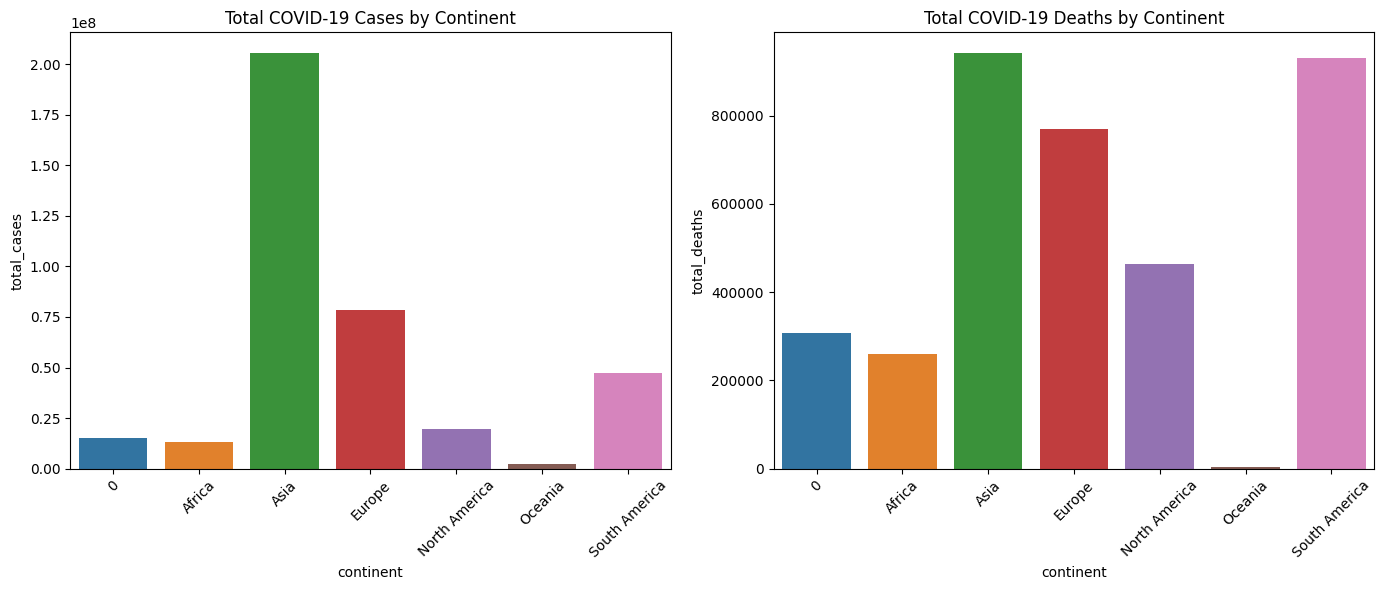

In [14]:
# Create a figure for the plots
plt.figure(figsize=(14, 6))

# Create a bar plot for total cases by continent
plt.subplot(1, 2, 1)
sns.barplot(x='continent', y='total_cases', data=continent_df)
plt.title('Total COVID-19 Cases by Continent')
plt.xticks(rotation=45)

# Create a bar plot for total deaths by continent
plt.subplot(1, 2, 2)
sns.barplot(x='continent', y='total_deaths', data=continent_df)
plt.title('Total COVID-19 Deaths by Continent')
plt.xticks(rotation=45)

# Show the plots
plt.tight_layout()
plt.show()

In [15]:
"""
The highest number of cases were detected in Asia, followed by Europe and America
The highest number of deaths were recorded in Asia, followed by America and Europe
"""

'\nThe highest number of cases were detected in Asia, followed by Europe and America\nThe highest number of deaths were recorded in Asia, followed by America and Europe\n'

In [16]:
# We don't see Australia, maybe 0 cases? or maybe the missing data is data from Australia?
# Let's filter just for the sake of it
# Filter data based on Australia
aus_df = deaths_df[deaths_df["continent"] == "Australia"]
aus_df

,iso_code,continent,location,date,population,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate


In [17]:
# No data.

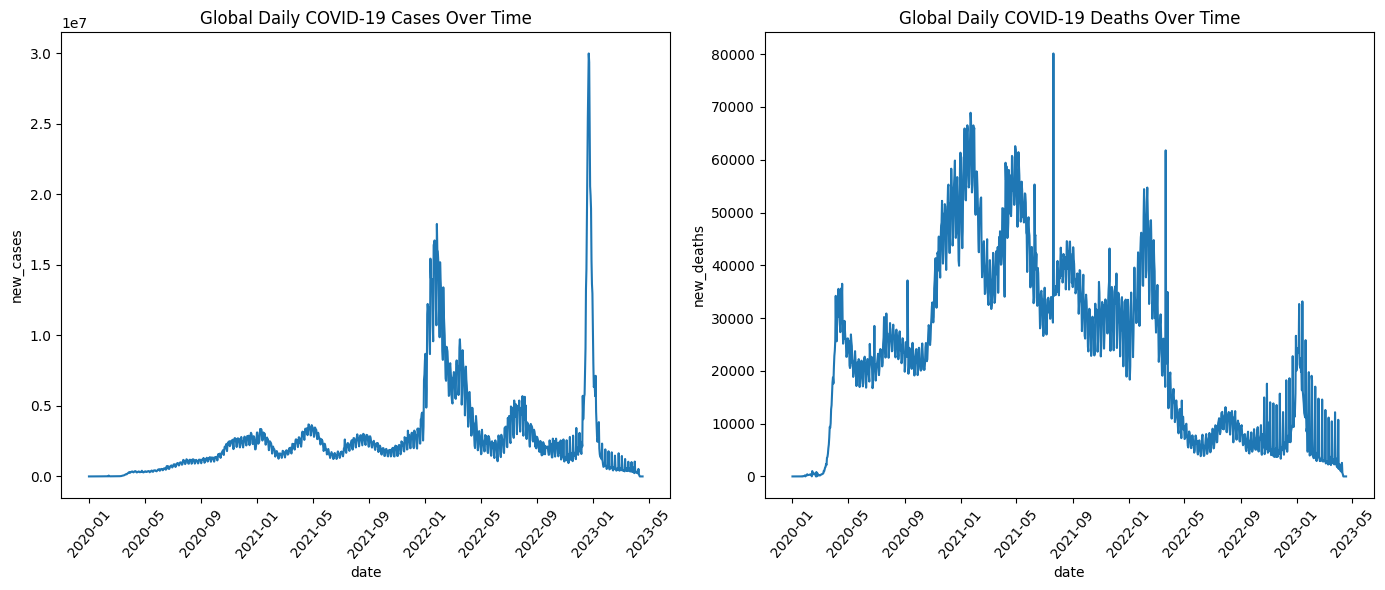

In [18]:
# Aggregate total cases and total deaths by date
global_trends = deaths_df.groupby('date').agg({'new_cases': 'sum', 'new_deaths': 'sum'}).reset_index()

# Create a figure for the plots
plt.figure(figsize=(14, 6))

# Create a line plot for total cases over time
plt.subplot(1, 2, 1)
sns.lineplot(x='date', y='new_cases', data=global_trends)
plt.xticks(rotation=50)
plt.title('Global Daily COVID-19 Cases Over Time')

# Create a line plot for total deaths over time
plt.subplot(1, 2, 2)
sns.lineplot(x='date', y='new_deaths', data=global_trends)
plt.xticks(rotation=50)
plt.title('Global Daily COVID-19 Deaths Over Time')

# Show the plots
plt.tight_layout()
plt.show()

In [19]:
top_10_countries = latest_data.nlargest(10, ['total_cases', 'total_deaths'])
top_10_countries

,location,iso_code,continent,date,population,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate
44,China,CHN,Asia,2023-04-12,1425887360,99239252.0,0.0,0.000,120905.0,0.0,1.143,69598.241,0.0,0.000,84.793,0.0,0.001,0.0
30,Brazil,BRA,South America,2023-04-12,215313504,37319254.0,0.0,0.000,700556.0,0.0,0.000,173325.190,0.0,0.000,3253.656,0.0,0.000,0.0
212,South Korea,KOR,Asia,2023-04-12,51815808,30918060.0,0.0,0.000,34332.0,0.0,0.000,596691.651,0.0,0.000,662.578,0.0,0.000,0.0
238,United Kingdom,GBR,Europe,2023-04-12,67508936,24330379.0,0.0,0.000,212083.0,0.0,0.000,360402.347,0.0,0.000,3141.554,0.0,0.000,0.0
231,Turkey,TUR,Asia,2023-04-12,85341248,17004677.0,0.0,0.000,101419.0,0.0,0.000,199255.078,0.0,0.000,1188.394,0.0,0.000,0.0
214,Spain,ESP,Europe,2023-04-12,47558632,13798747.0,0.0,0.000,120426.0,0.0,0.000,290141.798,0.0,0.000,2532.159,0.0,0.000,0.0
1,Africa,OWID_AFR,0,2023-04-12,1426736614,13074358.0,0.0,81.714,258841.0,0.0,0.857,9163.820,0.0,0.057,181.422,0.0,0.001,0.0
247,Vietnam,VNM,Asia,2023-04-12,98186856,11527745.0,0.0,48.857,43186.0,0.0,0.000,117406.193,0.0,0.498,439.835,0.0,0.000,0.0
103,Iran,IRN,Asia,2023-04-12,88550568,7597982.0,0.0,0.000,145571.0,0.0,0.000,85803.876,0.0,0.000,1643.931,0.0,0.000,0.0
142,Mexico,MEX,North America,2023-04-12,127504120,7553646.0,0.0,0.000,333596.0,0.0,0.000,59242.368,0.0,0.000,2616.355,0.0,0.000,0.0


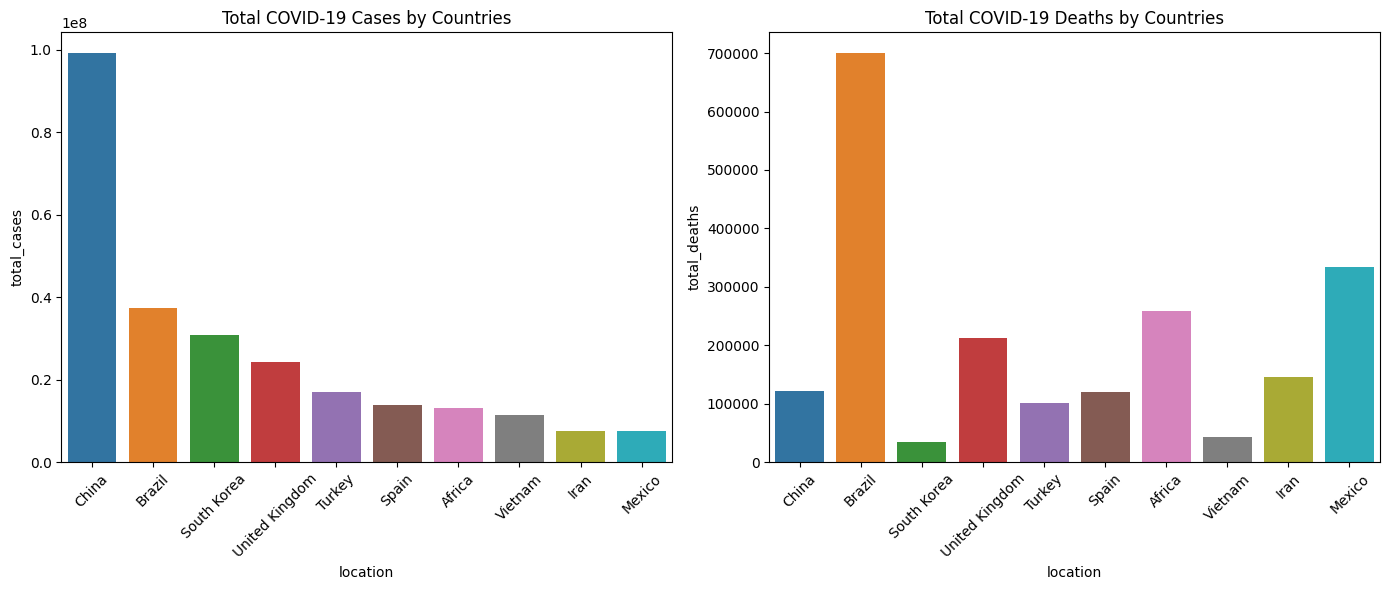

In [20]:
# Create a figure for the plots
plt.figure(figsize=(14, 6))

# Create a bar plot for total cases by continent
plt.subplot(1, 2, 1)
sns.barplot(x='location', y='total_cases', data=top_10_countries)
plt.title('Total COVID-19 Cases by Countries')
plt.xticks(rotation=45)

# Create a bar plot for total deaths by continent
plt.subplot(1, 2, 2)
sns.barplot(x='location', y='total_deaths', data=top_10_countries)
plt.title('Total COVID-19 Deaths by Countries')
plt.xticks(rotation=45)

# Show the plots
plt.tight_layout()
plt.show()

In [ ]:
"""
The highest number of cases detected were from China, followed by Brazil and South Korea
The highest number of deaths are recorded from Brazil, followed by Mexico and Africa
"""